## Introduction

Working memory is a fundamental cognitive function that is highly dependent on the prefrontal cortex. As a part of executive function, working memory allows us to temporarily hold information and is a vital part in decision making and reasoning. Additionally, it is understood that the prefrontal cortex is highly susceptible to the pathological effects of aging (Peters, 2006, Postgrad Med J).  

## What is the n-back task?

The n-back task is a widely used neuropsychological task that measures executive function capacity. 

It requires participants to decide whether each stimulus in a sequence matches the one that appeared n items ago. The higher the number, the more difficult the task.

<img src="n-back.webp" width="500" height="340">

Examples of visual and auditory 2-back tasks.

## Research Questions

Despite previous research on the prefrontal cortex and its relationship with working memory, the effects of aging on working memory brain connectivity is not well understood.

This leads us to the question, how is brain connectivity during working memory tasks impacted by age?

To answer this question, we perform a meta-analytic coactivation mapping analysis on a large set of fMRI studies investigating the n-back task across two different age groups.

## Methods

Selection of studies:
- Neuroimaging studies were chosen by using keywords fMRI, n-back, young, older, aging within a publishing year from 2011 to 2021 in the Web of Science database. 
- Only selected fMRI data from healthy individuals who performed the n-back task. 

71 fMRI articles that reported stereotaxic coordinates of brain activation during n-back task:​
- Young (23.57 +/- 5.63 years) (45 studies) (1029 foci)​
- Older (66.86 +/- 5.70 years) (13 studies) (182 foci)​

                        Total foci = 1211

Software Tools:​
- MRIcron, an MRI imaging tool used to translate MNI (Montreal Neurological Institute) locations into AAL regions of activation. ​
- NetworkX, a Python package for creation, manipulation, and study of complex networks. ​
- Gephi, a network analysis and visualization software package
- Yale Bioimagesuite

## Data acquisition

- 1211 stereotaxic coordinates from healthy participants were extracted from each of the 71 articles and recorded onto a Microsoft Excel sheet. ​

- Talaraich coordinates were converted to MNI.​

- MRIcron was used to translate MNI coordinates to one of 72 AAL(Automated anatomical labelling) regions. ​

- AAL regions were organized to show how many times the regions were activated in each study and converted from Excel to CSV.​

- Each time two regions of activation appeared together in each study, the weighted degree of that co-activation was increased.

- All co-activations were compiled and imported into Python, where we computed several weighted graph metrics

## Load data and region labels

In [4]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle
import itertools
import brainmaptools as brainmap
import community # optional
import matplotlib.pyplot as plt #optional
#import brainx.modularity as md # 
%matplotlib inline

In [5]:
#Load young adult data
data_young='/Users/inhauckchoi/Desktop/dataanalysis/YAnback+new.csv' #filename & path of rawdata file
keycodes_y=brainmap.build_keycodes_from_excel_csv(data_young) # load csv, builds a nested list

#Loads region names
data_young_df=pd.read_csv(data_young) 
regionlist_young=data_young_df.keys() # 
relabel_dict_ya={idx:x[:] for idx, x in enumerate(regionlist_young)} #dict for relabeling

In [6]:
#Load older adult data
data_old='/Users/inhauckchoi/Desktop/dataanalysis/Oldernback+new.csv' #filename & path of rawdata file
keycodes_o=brainmap.build_keycodes_from_excel_csv(data_old) # load csv, builds a nested list

#Loads region names
data_older_df=pd.read_csv(data_old) 
regionlist_older=data_older_df.keys() # 
relabel_dict_o={idx:x[:] for idx, x in enumerate(regionlist_older)} #dict for relabeling

## Build Initial Graphs


In [7]:
#The raw adjacency (numpy) matrix with edges = number of studies coactive 
coactive_array_y=brainmap.build_n_coactives_array(keycodes_y)

#The normalized adjacency (numpy) matrix with edges = number of studies coactive/number of studies active
jaccard_array_y=brainmap.build_jaccard(keycodes_y)

In [8]:
#The raw adjacency (numpy) matrix with edges = number of studies coactive 
coactive_array_o=brainmap.build_n_coactives_array(keycodes_o)

#The normalized adjacency (numpy) matrix with edges = number of studies coactive/number of studies active
jaccard_array_o=brainmap.build_jaccard(keycodes_o)

### Coactivation and Jaccard matrices

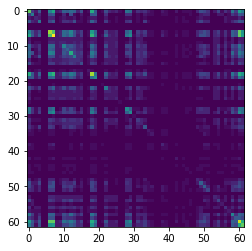

In [9]:
plt.imshow(coactive_array_y, interpolation='nearest') #coactive Young

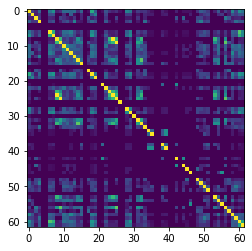

In [10]:
plt.imshow(jaccard_array_y, interpolation='nearest') #jaccard Young

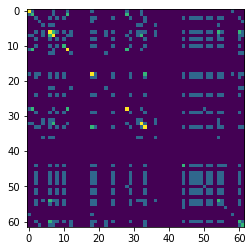

In [11]:
plt.imshow(coactive_array_o, interpolation='nearest') #coactive Older

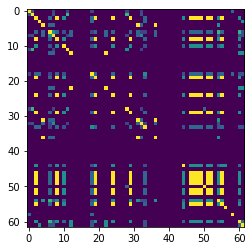

In [12]:
plt.imshow(jaccard_array_o, interpolation='nearest') #jaccard Older

## Import into NetworkX graphs

In [13]:
#Raw data
G_y=nx.from_numpy_matrix(coactive_array_y) #import
G_y=nx.relabel_nodes(G_y,relabel_dict_ya) # apply regionlist
G_y.remove_edges_from(nx.selfloop_edges(G_y)) # remove self-loops
G_y=brainmap.remove_edgeless_nodes(G_y) # remove nodes w/o edges

In [14]:
to_remove=[] #cleans up data
degree = G_y.degree()
for x in degree: 
    if x[1]==0:
        to_remove.append(x[0]) 

G_y.remove_nodes_from(to_remove)


In [38]:
G_y.degree() #finds the degrees of nodes from YOUNG adults

#basically, the number of connections it has to other nodes in the network

DegreeView({'Precentral_L': 49, 'Precentral_R': 31, 'Frontal_Sup_L': 32, 'Frontal_Sup_R': 36, 'Frontal_Mid_L': 45, 'Frontal_Mid_R': 47, 'Frontal_Mid_Orb_L': 25, 'Frontal_Mid_Orb_R': 33, 'Frontal_Inf_Oper_L': 41, 'Frontal_Inf_Oper_R': 37, 'Frontal_Inf_Tri_L': 44, 'Frontal_Inf_Tri_R': 41, 'Frontal_Inf_Orb_L': 30, 'Frontal_Inf_Orb_R': 43, 'Rolandic_Oper_R': 23, 'Supp_Motor_Area_L': 47, 'Supp_Motor_Area_R': 45, 'Olfactory_R': 6, 'Frontal_Sup_Medial_L': 42, 'Frontal_Sup_Medial_R': 26, 'Frontal_Mid_Orb_L.1': 25, 'Frontal_Mid_Orb_R.1': 33, 'Rectus_L': 1, 'Insula_L': 39, 'Insula_R': 42, 'Cingulum_Ant_L': 5, 'Cingulum_Ant_R': 36, 'Cingulum_Mid_L': 28, 'Cingulum_Mid_R': 33, 'Cingulum_Post_L': 23, 'Cingulum_Post_R': 19, 'ParaHippocampal_L': 22, 'ParaHippocampal_R': 19, 'Calcarine_L': 23, 'Cuneus_L': 20, 'Cuneus_R': 14, 'Lingual_L': 12, 'Occipital_Sup_L': 28, 'Occipital_Sup_R': 34, 'Occipital_Mid_L': 35, 'Occipital_Mid_R': 35, 'Occipital_Inf_R': 28, 'Fusiform_L': 37, 'Fusiform_R': 16, 'Postcentral

In [16]:
#Raw data
G_o=nx.from_numpy_matrix(coactive_array_o) #import
G_o=nx.relabel_nodes(G_o,relabel_dict_o) # apply regionlist
G_o.remove_edges_from(nx.selfloop_edges(G_o)) # remove self-loops
G_o=brainmap.remove_edgeless_nodes(G_o) # remove nodes w/o edges

In [17]:
to_remove=[] #cleans up data
degree = G_o.degree()
for x in degree: 
    if x[1]==0:
        to_remove.append(x[0]) 

G_o.remove_nodes_from(to_remove)

In [18]:
G_o.degree() #finds the degrees of nodes from OLDER adults

DegreeView({'Precentral_L': 7, 'Precentral_R': 5, 'Frontal_Sup_L': 18, 'Frontal_Sup_R': 3, 'Frontal_Sup_Orb_L': 6, 'Frontal_Mid_L': 26, 'Frontal_Mid_R': 14, 'Frontal_Mid_Orb_L': 18, 'Frontal_Inf_Oper_L': 18, 'Frontal_Inf_Oper_R': 5, 'Frontal_Inf_Tri_L': 5, 'Supp_Motor_Area_L': 22, 'Supp_Motor_Area_R': 18, 'Frontal_Sup_Medial_L': 5, 'Frontal_Mid_Orb_L.1': 18, 'Insula_L': 6, 'Insula_R': 18, 'Cingulum_Ant_R': 6, 'Cingulum_Mid_L': 11, 'Cingulum_Mid_R': 21, 'Hippocampus_L': 6, 'Cuneus_L': 19, 'Lingual_L': 18, 'Lingual_R': 18, 'Occipital_Sup_L': 18, 'Occipital_Sup_R': 18, 'Occipital_Mid_L': 1, 'Occipital_Mid_R': 18, 'Occipital_Inf_L': 18, 'Fusiform_L': 23, 'Fusiform_R': 18, 'Postcentral_L': 1, 'Parietal_Sup_L': 2, 'Parietal_Inf_L': 22, 'Parietal_Inf_R': 8})

### Draw a graph (no frills)

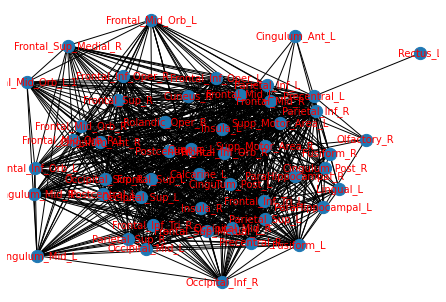

In [53]:
nx.draw_kamada_kawai(G_y, with_labels=True, font_size=10, node_size=150, font_color="red")

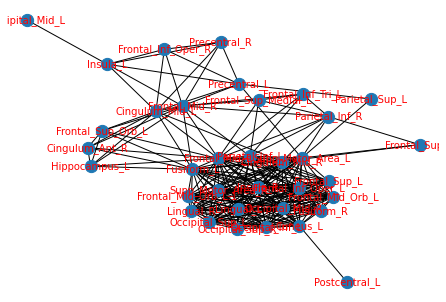

In [54]:
nx.draw_kamada_kawai(G_o, with_labels=True, font_size=10, node_size=150, font_color="red")

## Run Graph Metrics

In [21]:
graph_metrics={}
graph_metrics['young']=brainmap.run_weighted_metrics(G_y, 10)
graph_metrics['old']=brainmap.run_weighted_metrics(G_o, 10)


## Report this as difference in the Young vs Old: topologie of hubs

In [22]:
graph_metrics['young']['topdegree_cent'] 
#shows 10 AAL regions with the highest degrees of centrality in younger

[('Precentral_L', 0.9999999999999999),
 ('Supp_Motor_Area_L', 0.9591836734693877),
 ('Frontal_Mid_R', 0.9591836734693877),
 ('Parietal_Inf_L', 0.9387755102040816),
 ('Supp_Motor_Area_R', 0.9183673469387754),
 ('Frontal_Mid_L', 0.9183673469387754),
 ('Parietal_Sup_L', 0.8979591836734693),
 ('Frontal_Inf_Tri_L', 0.8979591836734693),
 ('Frontal_Inf_Orb_R', 0.8775510204081632),
 ('Parietal_Inf_R', 0.8571428571428571)]

In [25]:
graph_metrics['old']['topdegree_cent']
#shows 10 AAL regions with the highest degrees of centrality in older

[('Frontal_Mid_L', 0.7647058823529411),
 ('Fusiform_L', 0.6764705882352942),
 ('Parietal_Inf_L', 0.6470588235294118),
 ('Supp_Motor_Area_L', 0.6470588235294118),
 ('Cingulum_Mid_R', 0.6176470588235294),
 ('Cuneus_L', 0.5588235294117647),
 ('Fusiform_R', 0.5294117647058824),
 ('Occipital_Inf_L', 0.5294117647058824),
 ('Occipital_Mid_R', 0.5294117647058824),
 ('Occipital_Sup_R', 0.5294117647058824)]

In [26]:
nx.write_gexf(G_y,"G_young.gexf") 
#new file for network visualization through Gephi

In [27]:
nx.write_gexf(G_o,"G_old.gexf") 
#new file for network visualization through Gephi

In [28]:
G_o.edge_attr_dict_factory(data=True)

{'data': True}

In [32]:
k = 2
comp = nx.community.girvan_newman(G_o)
for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities))
    
#used to find communities within this graph, doesn't exactly print out the way i wanted it to...

(['Cingulum_Ant_R', 'Cingulum_Mid_L', 'Cingulum_Mid_R', 'Cuneus_L', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L', 'Frontal_Mid_L', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_L.1', 'Frontal_Mid_R', 'Frontal_Sup_L', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Orb_L', 'Frontal_Sup_R', 'Fusiform_L', 'Fusiform_R', 'Hippocampus_L', 'Insula_L', 'Insula_R', 'Lingual_L', 'Lingual_R', 'Occipital_Inf_L', 'Occipital_Mid_R', 'Occipital_Sup_L', 'Occipital_Sup_R', 'Parietal_Inf_L', 'Parietal_Inf_R', 'Parietal_Sup_L', 'Postcentral_L', 'Precentral_L', 'Precentral_R', 'Supp_Motor_Area_L', 'Supp_Motor_Area_R'], ['Occipital_Mid_L'])
(['Cingulum_Ant_R', 'Cingulum_Mid_L', 'Cingulum_Mid_R', 'Cuneus_L', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L', 'Frontal_Mid_L', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_L.1', 'Frontal_Mid_R', 'Frontal_Sup_L', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Orb_L', 'Frontal_Sup_R', 'Fusiform_L', 'Fusiform_R', 'Hippocampus_L', 'Insula_L', 'Insula_R', 'Lingual_L', 

In [65]:
weighted_metrics=brainmap.run_weighted_metrics(G_y, 10)

In [66]:
weighted_metrics['topdegrees']

[('Parietal_Inf_L', 296.0),
 ('Frontal_Mid_R', 289.0),
 ('Supp_Motor_Area_L', 283.0),
 ('Frontal_Mid_L', 270.0),
 ('Precentral_L', 263.0),
 ('Parietal_Inf_R', 223.0),
 ('Frontal_Inf_Tri_L', 203.0),
 ('Insula_R', 191.0),
 ('Frontal_Inf_Oper_L', 185.0),
 ('Parietal_Sup_L', 181.0)]

In [67]:
weighted_metrics['topdegree_cent']

[('Precentral_L', 0.9999999999999999),
 ('Supp_Motor_Area_L', 0.9591836734693877),
 ('Frontal_Mid_R', 0.9591836734693877),
 ('Parietal_Inf_L', 0.9387755102040816),
 ('Supp_Motor_Area_R', 0.9183673469387754),
 ('Frontal_Mid_L', 0.9183673469387754),
 ('Parietal_Sup_L', 0.8979591836734693),
 ('Frontal_Inf_Tri_L', 0.8979591836734693),
 ('Frontal_Inf_Orb_R', 0.8775510204081632),
 ('Parietal_Inf_R', 0.8571428571428571)]

In [68]:
weighted_metrics['topbetween_cent']

[('Rolandic_Oper_R', 0.05726589405156551),
 ('Frontal_Sup_L', 0.053707491044149284),
 ('Precentral_L', 0.053080408208839164),
 ('Cuneus_L', 0.05306510851278692),
 ('Postcentral_R', 0.0525883955711767),
 ('Calcarine_L', 0.050139269648160935),
 ('Cingulum_Post_L', 0.03875859047292228),
 ('Insula_L', 0.03244650833133528),
 ('ParaHippocampal_R', 0.03097865121297761),
 ('Cuneus_R', 0.02893173114788781)]

## Results

- Young adult data suggests that working memory neural network communication is dominated by the fronto-parietal regions of the brain, as the precentral gyrus had a  weighted degree of centrality of nearly 1.​

- Older adult data suggests that brain activation patterns show less involvement in the frontal-parietal regions compared to that of the young adults, as the frontal gyrus had a weighted degree of .765.​

- Weighted metric data shows a shift in network centrality from fronto-parietal regions (left precentral gyrus, middle frontal gyrus) in young adults to more posterior/middle regions of the brain (fusiform gyrus, supplementary motor area) in older adults.​

- Brain network centrality shifts to areas of the brain that are not as well suited to completing the n-back task as the fronto-parietal areas. ​

- Young adults data shows a more densely connected network than that of the older adults.​

- Graph metrics suggest that brain activation symmetry during working memory tasks does not differ between young and older adults, as the 20 of the AAL regions with the highest degrees of centrality for both age groups had similar amounts of left/right brain regions activated.

## Conclusion

This research will expand the knowledge base on the effects of aging on the brain. Understanding how brain networks changes throughout aging may have implications that can be used to improve brain healthcare and reduce the impact of cognitive decline as we age. For instance, the shift of centrality to sensory regions during aging may suggest that we adjust Alzheimer treatment strategies to utilize treatment options that involve sensory applications.